In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [36]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 범주형 변수

In [37]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [38]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second
train['dayofweek'] = train.datetime.dt.dayofweek

In [39]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [40]:
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['minute'] = test.datetime.dt.minute
test['second'] = test.datetime.dt.second
test['dayofweek'] = test.datetime.dt.dayofweek

In [41]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

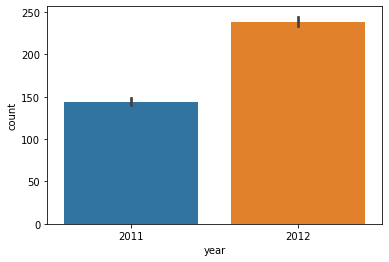

In [42]:
sns.barplot(data=train, x='year', y='count')

<AxesSubplot:xlabel='month', ylabel='count'>

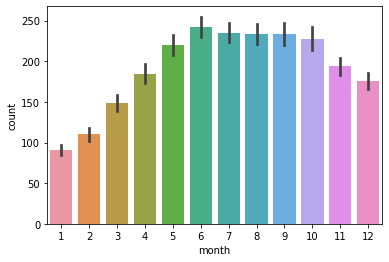

In [43]:
sns.barplot(data = train, x='month', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

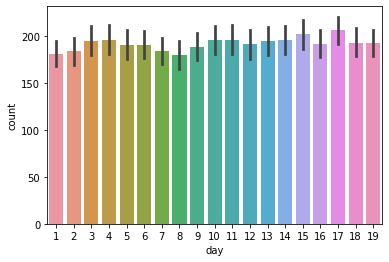

In [44]:
sns.barplot(data = train, x='day', y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

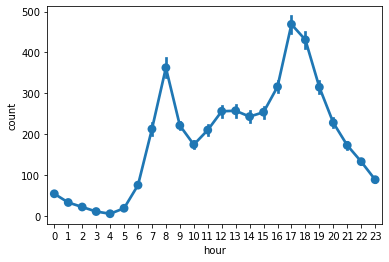

In [45]:
sns.pointplot(data=train, x='hour', y = 'count')

<AxesSubplot:xlabel='hour', ylabel='count'>

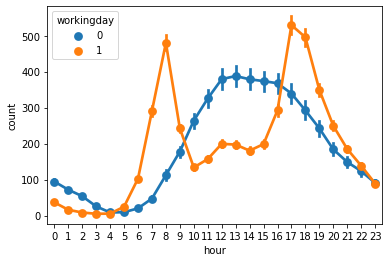

In [46]:
sns.pointplot(data=train, x='hour', y = 'count', hue='workingday')

<AxesSubplot:xlabel='hour', ylabel='count'>

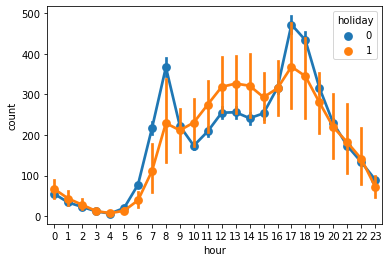

In [47]:
sns.pointplot(data=train, x='hour', y = 'count', hue='holiday')

<AxesSubplot:xlabel='hour', ylabel='count'>

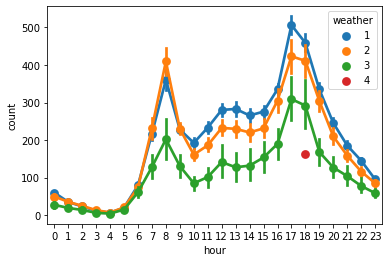

In [48]:
sns.pointplot(data=train, x='hour', y = 'count', hue='weather')

In [49]:
def is_weekend(dayofweek):
    if dayofweek in [0,1,2,3,4]:
        return 1
    else:
        return 0
train['weekday'] = train['dayofweek'].apply(is_weekend)
test['weekday'] = test['dayofweek'].apply(is_weekend)

<AxesSubplot:xlabel='hour', ylabel='count'>

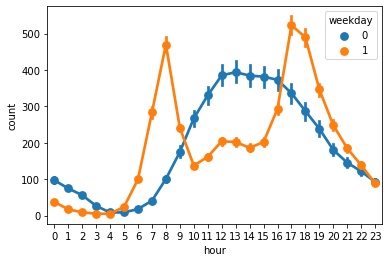

In [50]:
sns.pointplot(data=train, x='hour', y='count', hue='weekday')

<AxesSubplot:>

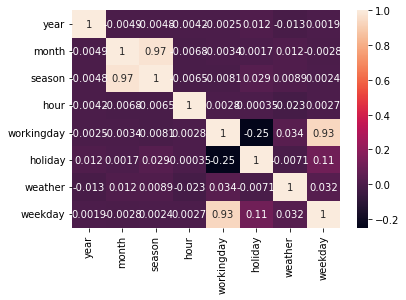

In [51]:
corr_data = train[['year', 'month', 'season', 'hour', 'workingday','holiday', 'weather','weekday']]
sns.heatmap(corr_data.corr(), annot=True)

month와 season은 상관관계가 높을 것으로 예상했는데 예상과 동일하게 나옴.
==> month만 이용하고 season은 제거한 후 모델링 하자. (season을 세분화 한 것이 month이고, month는 연속형으로도 볼 수 있으므로 원핫인코딩 안해도 되는 이점이 있기 때문)

workingday, holiday, weekday도 상관관계가 높을 것으로 예상했는데, workingday와 weekday의 상관관계가 있었고, holiday는 음의 상관관계(0,1이 반대 의미를 가져서)를 가지지만 절댓값이 낮음..!
==> workingday만 사용하기로 함

# 연속형 변수

<AxesSubplot:>

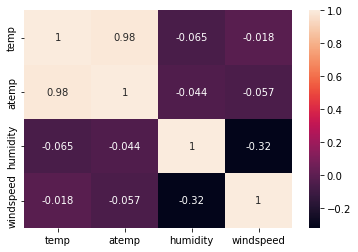

In [52]:
corr_data2 = train[['temp', 'atemp', 'humidity', 'windspeed']]
sns.heatmap(corr_data2.corr(), annot = True)

<AxesSubplot:xlabel='temp', ylabel='count'>

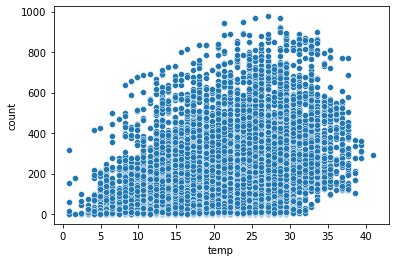

In [53]:
sns.scatterplot(data=train, x='temp', y='count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

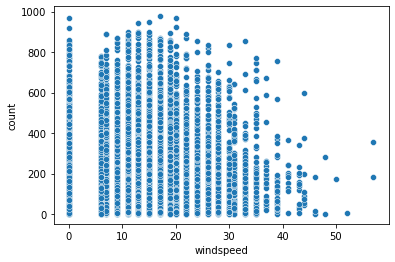

In [54]:
sns.scatterplot(data=train, x='windspeed', y='count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

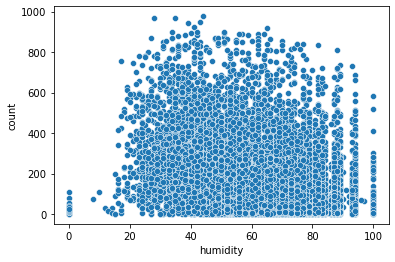

In [55]:
sns.scatterplot(data=train, x='humidity', y='count')

<AxesSubplot:xlabel='count'>

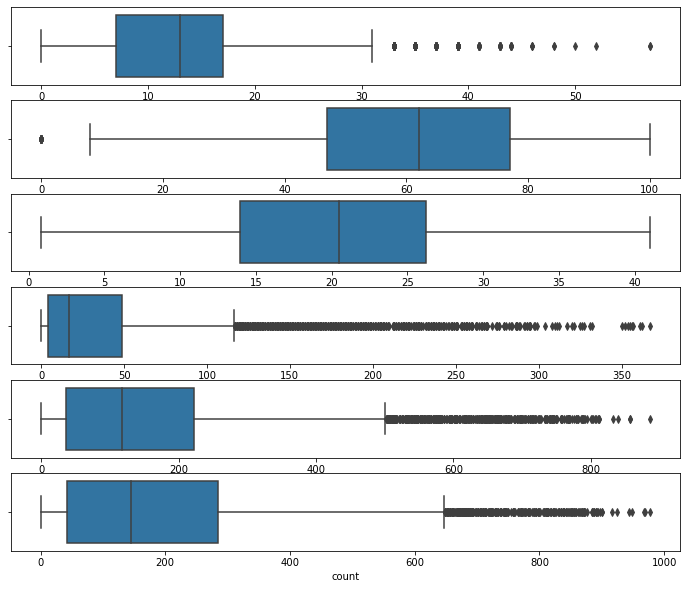

In [56]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [380]:
# 3가지 변수 모두 outlier인 행 제거 함수
from collections import Counter
def outlier_remover(data, columns):
    outlier_idx = []
    for column in columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3-q1
        min = q1 - 1.5*iqr
        max = q3 + 1.5*iqr
        outlier_idx.extend(data[(data[column]<min)|(data[column]>max)].index)
        
    multi = Counter(outlier_idx)
    final = list(k for k, v in multi.items() if v > 2)
    return final

In [381]:
outlier_drop_index = outlier_remover(train, ['windspeed','humidity', 'temp', 'casual', 'registered', 'count'])
print(outlier_drop_index)

[7017, 7473, 7991, 8000, 8528, 9243, 9244, 9479, 9652, 9655, 6658, 6779, 6825, 6849, 6850, 6897, 7088, 7640, 7641, 7664, 7881, 8002, 8024, 8048, 8049, 8456, 8768, 8793, 8794, 8962, 8984, 8986, 9008, 9267, 9296, 9320, 9392, 9632, 9800, 9920]


In [382]:
print(len(train))
train = train.drop(outlier_drop_index, axis=0).reset_index(drop=True)
print(len(train))

10886
10846


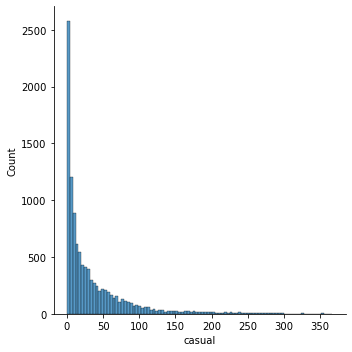

In [60]:
sns.displot(train['casual'])

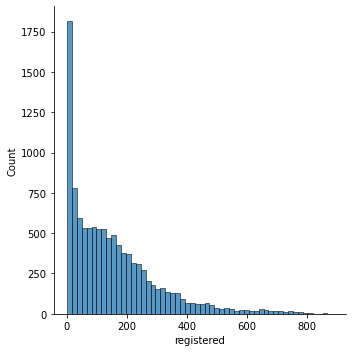

In [61]:
sns.displot(train['registered'])

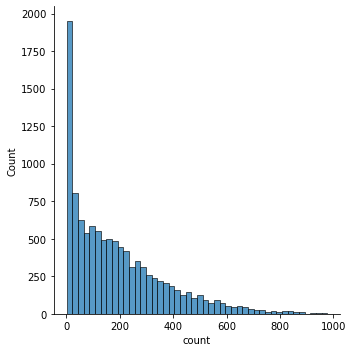

In [65]:
sns.displot(train['count'])

In [63]:
train['count_log'] = train['count'].map(lambda x: np.log(x) if x > 0 else 0)
train['casual_log'] = train['casual'].map(lambda x: np.log(x) if x > 0 else 0)
train['registered_log'] = train['registered'].map(lambda x: np.log(x) if x > 0 else 0)

In [66]:
from sklearn.ensemble import RandomForestRegressor

def predict_windspeed(data):
    windspeed_0 = data[data['windspeed']==0]
    windspeed_not_0 = data[data['windspeed']!=0]
    input_variable = windspeed_not_0[['season', 'weather', 'temp', 'humidity']]
    target_variable = windspeed_not_0[['windspeed']]
    
    
    rf = RandomForestRegressor()
    rf.fit(input_variable, target_variable)
    prediction_windspeed = rf.predict(windspeed_0[['season', 'weather', 'temp', 'humidity']])
    windspeed_0['windspeed'] =  prediction_windspeed
    
    data = pd.concat([windspeed_0, windspeed_not_0], axis=0)
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)

/Users/minseonkim/opt/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/Users/minseonkim/opt/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/minseonkim/opt/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by Intera

In [68]:
categorical_column = ['workingday', 'holiday', 'weather']
for i in categorical_column:
    train = pd.get_dummies(train, columns= [i], prefix= i)

In [69]:
for i in categorical_column:
    test = pd.get_dummies(test, columns= [i], prefix= i)

In [70]:
train.columns

Index(['datetime', 'season', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek', 'weekday', 'count_log', 'casual_log',
       'registered_log', 'workingday_0', 'workingday_1', 'holiday_0',
       'holiday_1', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [71]:
train.drop(['datetime', 'season', 'atemp', 'casual', 'registered', 
            'count', 'minute', 'second', 'dayofweek', 'weekday', 
            'casual_log', 'registered_log'], axis = 1, inplace = True)

In [72]:
test_datetime = test['datetime']

In [73]:
test.drop(['datetime', 'season', 'atemp', 'minute', 'second', 'dayofweek', 'weekday'], axis = 1, inplace = True)

In [74]:
x = train.drop(['count_log'], axis=1)
y = train['count_log']

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param = {'min_samples_split': [15, 30],
        'max_depth': [5, 6],
        'n_estimators': [1000, 2000]}

In [79]:
regressor = GradientBoostingRegressor()

In [80]:
gs = GridSearchCV(estimator=regressor, param_grid=param, cv=3)
gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6], 'min_samples_split': [15, 30],
                         'n_estimators': [1000, 2000]})

In [81]:
print('GBR 파라미터: ', gs.best_params_)
print('GBR 예측 정확도: {:.4f}'.format(gs.best_score_))

GBR 파라미터:  {'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 1000}
GBR 예측 정확도: 0.9439


In [82]:
print(gs.score(x_val, y_val))

0.9498757576099536


In [85]:
pred = gs.predict(test)
print(pred)

[1.47552637 1.08921648 4.19677038 ... 5.15911119 4.89860819 4.56363586]


In [86]:
submission['datetime'] = test_datetime
submission['count_log'] = pred
submission['count'] = np.exp(submission['count_log'])
submission.drop(['count_log'], axis=1, inplace=True)

In [87]:
submission.to_csv('./Submission.csv')

## 최소최대정규화(Min-Max Scailing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler()
sclaer.fit(train['count'])
train['scaled count'] = sclaer.transform(train['count'])
test['scaled count'] = sclaer.transform(test['count'])

## 결측치 평균 대체

In [ ]:
# 1
train['windspeed'].fillna(train['windspeed'].mean(), inplace=True)
# 2
train['windspeed'].interpolate(inplace=True)
# 3
train['windspeed'].fillna(train['windspeed'].dropna().median(), inplace=True)